In [3]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [4]:
train = pd.read_csv('data/train_null_only.csv')
test = pd.read_csv('data/test_null_only.csv')
submission = pd.read_csv('data/submission.csv')

In [5]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [6]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [9]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [7]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.717447,0.031572,2.479048,52.231256,1405.217675,0.039155,57.168905,30.325747,108.563400
std,631.338681,6.922790,5.235555,0.174797,1.374005,20.356410,582.731618,0.018994,30.774814,14.110562,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,880.000000,0.026000,37.000000,21.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.400000,51.000000,1576.000000,0.039265,53.000000,28.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [10]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000028,-0.056253,-0.003344,-0.017945,0.008949,0.053970,-0.024834,0.003408,-0.002131
hour,-0.010901,1.000000,0.406796,0.021619,0.460619,-0.329200,0.176270,0.368568,-0.033860,-0.057143,0.626047
hour_bef_temperature,-0.000028,0.406796,1.000000,-0.097056,0.375223,-0.496088,0.197417,0.530186,-0.003728,-0.074828,0.618890
hour_bef_precipitation,-0.056253,0.021619,-0.097056,1.000000,0.022743,0.276481,-0.217155,-0.060389,-0.048439,0.004414,-0.163849
hour_bef_windspeed,-0.003344,0.460619,0.375223,0.022743,1.000000,-0.432775,0.251602,0.511010,0.009878,-0.191450,0.458621
hour_bef_humidity,-0.017945,-0.329200,-0.496088,0.276481,-0.432775,1.000000,-0.592244,-0.411332,-0.104700,0.159160,-0.470751
hour_bef_visibility,0.008949,0.176270,0.197417,-0.217155,0.251602,-0.592244,1.000000,0.098954,-0.389383,-0.612094,0.298846
hour_bef_ozone,0.053970,0.368568,0.530186,-0.060389,0.511010,-0.411332,0.098954,1.000000,0.111558,0.016873,0.468544
hour_bef_pm10,-0.024834,-0.033860,-0.003728,-0.048439,0.009878,-0.104700,-0.389383,0.111558,1.000000,0.474265,-0.110886
hour_bef_pm2.5,0.003408,-0.057143,-0.074828,0.004414,-0.191450,0.159160,-0.612094,0.016873,0.474265,1.000000,-0.129363


<AxesSubplot:>

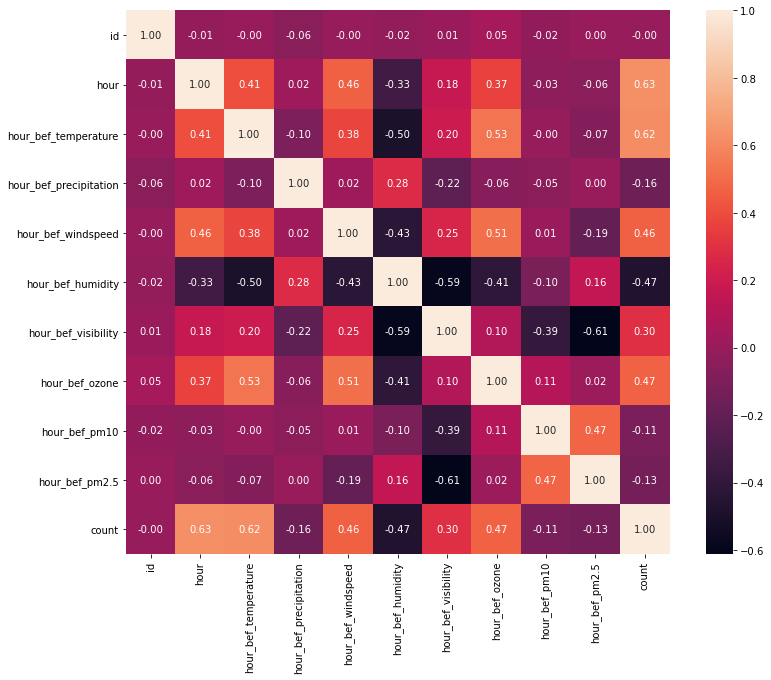

In [12]:
train_corr = train.corr()
f, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(train_corr, annot=True, fmt = '.2f', square=True)

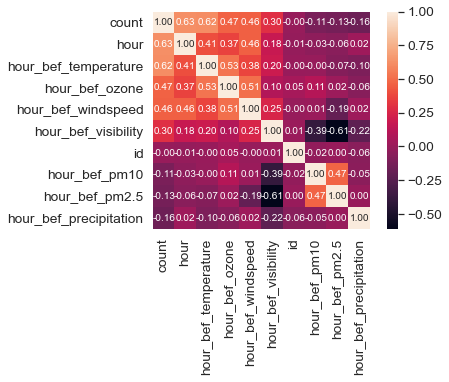

In [24]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = train_corr.nlargest(k, 'count')['count'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## 대여량 예측이 목표이기 때문에 대여량을 기준으로 상관관계를 파악
#### 양의 상관관계 (0.30 이상)

- hour
- temperature
- windspeed
- visibility
- ozone

#### 음의 상관관계

- humidity

## 상관관계가 별로 없는, 즉, 비선형 자료는 로그 변환이나 데이터 변환을 통해 해결

#### 변환 대상

- precipitation
- pm10
- pm2.5

<AxesSubplot:xlabel='hour_bef_pm2.5', ylabel='count'>

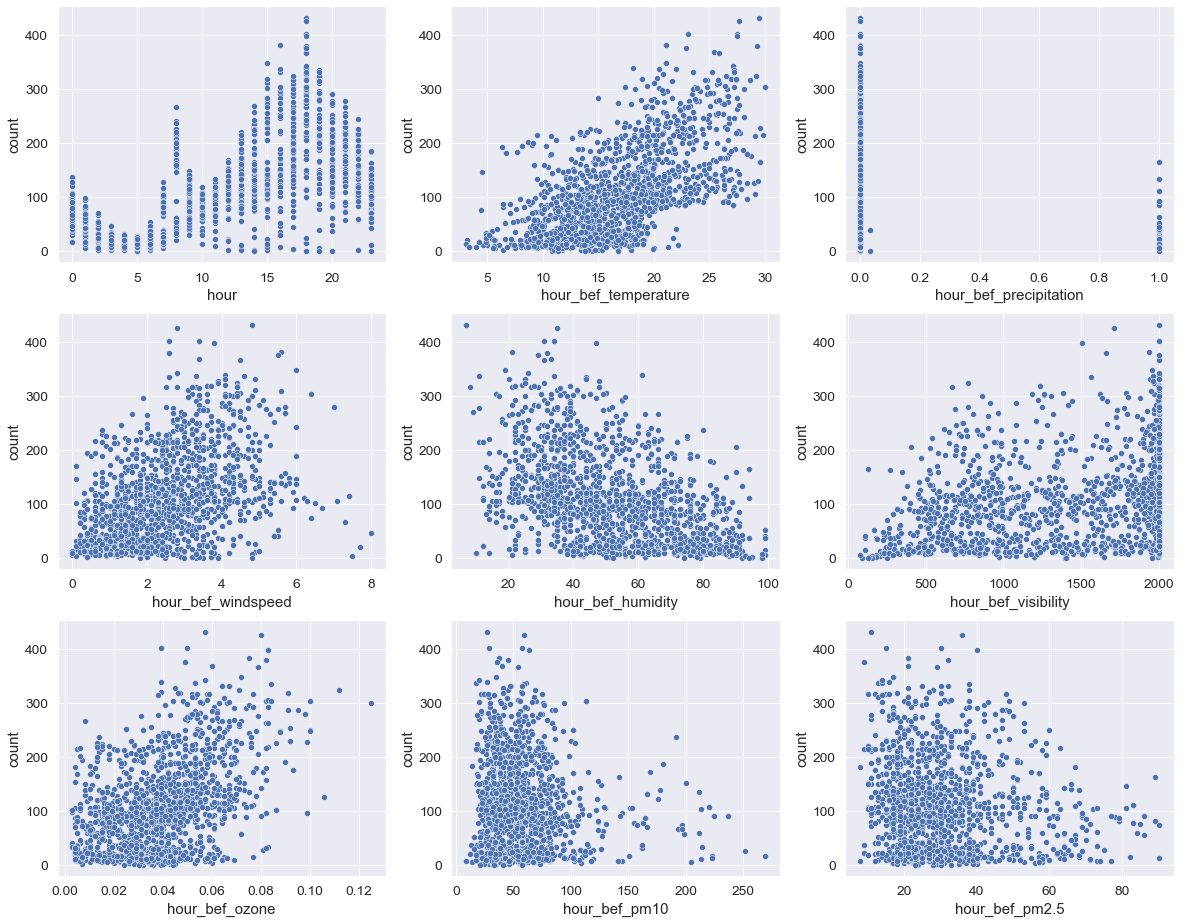

In [42]:
cat_columns = ["hour", "hour_bef_temperature", "hour_bef_precipitation", "hour_bef_windspeed", "hour_bef_humidity",
               "hour_bef_visibility", "hour_bef_ozone", "hour_bef_pm10", "hour_bef_pm2.5"]

figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 16))

sns.scatterplot(data = train, x = 'hour', y = 'count', ax = axes[0][0])
sns.scatterplot(data = train, x = 'hour_bef_temperature', y = 'count', ax = axes[0][1])
sns.scatterplot(data = train, x = 'hour_bef_precipitation', y = 'count', ax = axes[0][2])
sns.scatterplot(data = train, x = 'hour_bef_windspeed', y = 'count', ax = axes[1][0])
sns.scatterplot(data = train, x = 'hour_bef_humidity', y = 'count', ax = axes[1][1])
sns.scatterplot(data = train, x = 'hour_bef_visibility', y = 'count', ax = axes[1][2])
sns.scatterplot(data = train, x = 'hour_bef_ozone', y = 'count', ax = axes[2][0])
sns.scatterplot(data = train, x = 'hour_bef_pm10', y = 'count', ax = axes[2][1])
sns.scatterplot(data = train, x = 'hour_bef_pm2.5', y = 'count', ax = axes[2][2])

상관관계 분석을 통해 다양한 데이터 전처리 방법을 구상

- IQR(Interquartile Range method)의 범위 내에 속하지 않는 데이터를 이상치로 판단하여 제거 (제거대상: 기온, 습도, 오존)
- 비선형 데이터를 로그 변환을 통해 변환
- 비선형 데이터 컬럼 삭제
- 정규화 - Z-Score Normalization (Z-점수 정규화) or IQR 적용 후에 Min-Max Normalization (최소-최대 정규화)